<a href="https://colab.research.google.com/github/Zabihuddin/data_analysis/blob/main/Copy_of_again_ddos_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 --version

Python 3.11.13


In [ ]:
 from google.colab import drive
# Connect to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TerminateOnNaN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- Step 1: Load and Merge Data ---
data_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tools & technique/dataset/dataset_sdn.csv')

In [ ]:
data_original.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
pip install lightgbm xgboost

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-model-optimization==0.7.5

!pip install numpy==1.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing instal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 77.1 MB/s eta 0:00:00
^C


In [ ]:
!pip install shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4e3339c31b3a5f81b3b910d977af474fe3e165e2e4d8cf76753892cc09d3db21
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
#!pip install lime
import tensorflow as tf
import tensorflow_model_optimization as tfmot
import numpy as np

print("TensorFlow:", tf.__version__)
print("TFMOT:", tfmot.__version__)
print("NumPy:", np.__version__)

TensorFlow: 2.15.0
TFMOT: 0.7.5
NumPy: 1.26.4


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TerminateOnNaN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- Step 1: Load and Merge Data ---
data_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tools & technique/dataset/dataset_sdn.csv')
data_gan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tools & technique/dataset/gan_synthetic_data (3).csv')

data_original.columns = data_original.columns.str.lower()
data_gan.columns = data_gan.columns.str.lower()

# Align column names
all_columns = sorted(set(data_original.columns).union(set(data_gan.columns)))
for col in all_columns:
    if col not in data_original.columns:
        data_original[col] = 0
    if col not in data_gan.columns:
        data_gan[col] = 0

data_original = data_original[all_columns]
data_gan = data_gan[all_columns]

# 🔧 Ensure unique columns before concat
data_original = data_original.loc[:, ~data_original.columns.duplicated()]
data_gan = data_gan.loc[:, ~data_gan.columns.duplicated()]

data_combined = pd.concat([data_original, data_gan], ignore_index=True)

# --- Step 2: Feature Engineering ---
tls_features = [col for col in ['tls_version', 'tls_cipher'] if col in data_combined.columns]
numeric_features = [
    'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
    'packetins', 'pktperflow', 'byteperflow', 'pktrate',
    'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps',
    'protocol'
]
feature_cols = [col for col in tls_features + numeric_features if col in data_combined.columns]
X_df = data_combined[feature_cols].copy()

# Fill numeric columns and one-hot encode
X_df = X_df.apply(pd.to_numeric, errors='coerce')
X_df = X_df.fillna(X_df.mean(numeric_only=True))
X_encoded = pd.get_dummies(X_df)

# --- Step 3: Prepare Features and Labels ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X = X_scaled.astype(np.float32)
y = np.clip(data_combined['label'].astype(int).values, 0, 1)

# --- Step 4: Reshape and Split ---
X = X.reshape((X.shape[0], 1, X.shape[1]))
X_train_dl, X_test_dl, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Build Improved CNN-LSTM Model ---
def build_improved_cnn_lstm(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LSTM(64)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

model = build_improved_cnn_lstm(X_train_dl.shape[1:])
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# --- Step 6: Class Weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# --- Step 7: Train ---
model.fit(
    X_train_dl, y_train,
    validation_split=0.1,
    epochs=12,
    batch_size=64,
    callbacks=[TerminateOnNaN()],
    class_weight=class_weights_dict,
    verbose=1
)

# --- Step 8: Feature Extraction ---
feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
train_features = feature_model.predict(X_train_dl)
test_features = feature_model.predict(X_test_dl)

# Replace any NaNs (if any)
train_features = np.nan_to_num(train_features)
test_features = np.nan_to_num(test_features)

# --- Step 9: Train SVM ---
svm = SVC(probability=True)
svm.fit(train_features, y_train)

# --- Step 10: Evaluate ---
preds = svm.predict(test_features)
print("✅ Hybrid CNN-LSTM-SVM Ensemble Accuracy:", accuracy_score(y_test, preds))
print("🔍 Classification Report:\n", classification_report(y_test, preds))


Epoch 1/12
1186/1186 [==============================] - 11s 7ms/step - loss: 0.1379 - accuracy: 0.9400 - val_loss: 0.0844 - val_accuracy: 0.9640
Epoch 2/12
1186/1186 [==============================] - 6s 5ms/step - loss: 0.0748 - accuracy: 0.9686 - val_loss: 0.0626 - val_accuracy: 0.9728
Epoch 3/12
1186/1186 [==============================] - 7s 6ms/step - loss: 0.0635 - accuracy: 0.9734 - val_loss: 0.0519 - val_accuracy: 0.9792
Epoch 4/12
1186/1186 [==============================] - 6s 5ms/step - loss: 0.0564 - accuracy: 0.9761 - val_loss: 0.0388 - val_accuracy: 0.9834
Epoch 5/12
1186/1186 [==============================] - 7s 6ms/step - loss: 0.0523 - accuracy: 0.9777 - val_loss: 0.0418 - val_accuracy: 0.9824
Epoch 6/12
1186/1186 [==============================] - 6s 5ms/step - loss: 0.0497 - accuracy: 0.9788 - val_loss: 0.0360 - val_accuracy: 0.9843
Epoch 7/12
1186/1186 [==============================] - 7s 6ms/step - loss: 0.0469 - accuracy: 0.9805 - val_loss: 0.0314 - val_accuracy

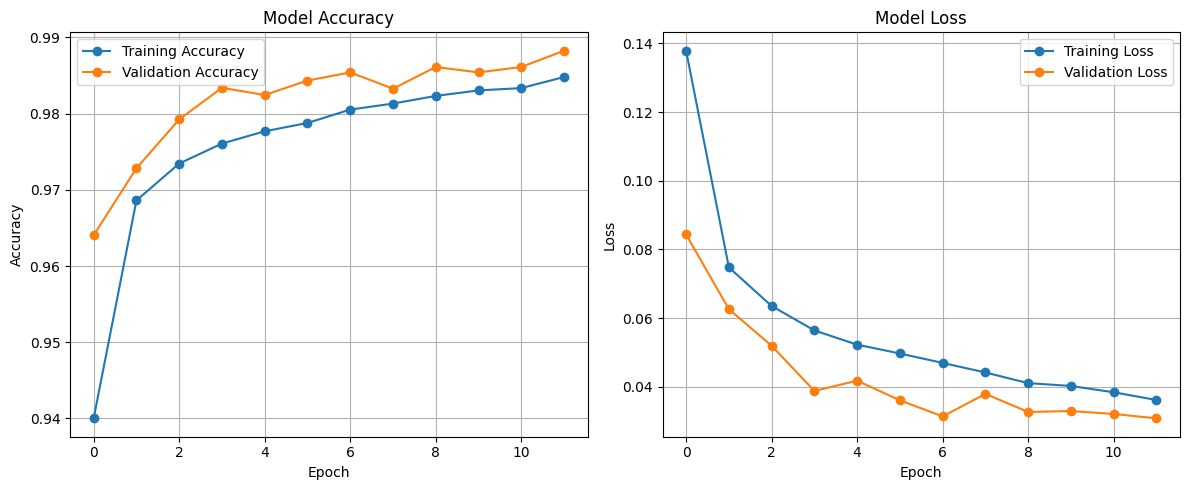

In [ ]:
import matplotlib.pyplot as plt

# Access the history object from model.fit()
history = model.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# --- Step 10: Evaluate ---
preds = svm.predict(test_features)
print("✅ Hybrid CNN-LSTM-SVM Ensemble Accuracy:", accuracy_score(y_test, preds))
print("🔍 Classification Report:\n", classification_report(y_test, preds))


✅ Hybrid CNN-LSTM-SVM Ensemble Accuracy: 0.9914091793630452
🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12743
           1       0.99      0.99      0.99      8326

    accuracy                           0.99     21069
   macro avg       0.99      0.99      0.99     21069
weighted avg       0.99      0.99      0.99     21069



In [ ]:
def save_model_report(y_true, y_pred, base_path="/content/drive/MyDrive/Colab Notebooks/tools & technique/results"):
    from datetime import datetime
    import os
    os.makedirs(base_path, exist_ok=True)
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    report_path = os.path.join(base_path, f"report_{timestamp}.txt")

    with open(report_path, "w") as f:
        f.write("✅ Hybrid CNN-LSTM-SVM Evaluation\n")
        f.write(f"🕒 Timestamp: {timestamp}\n\n")
        f.write(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(classification_report(y_true, y_pred))

    print(f"📁 Report saved to: {report_path}")


In [ ]:
save_model_report(y_test, preds)


📁 Report saved to: /content/drive/MyDrive/Colab Notebooks/tools & technique/results/report_2025-07-14_15-55-26.txt


In [ ]:
# Save CNN-LSTM model
model.save(os.path.join(results_dir, f"cnn_lstm_model_{timestamp}.keras"))

# Save SVM using joblib
import joblib
joblib.dump(svm, os.path.join(results_dir, f"svm_model_{timestamp}.joblib"))

print("✅ Models saved successfully.")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix

# --- Create results directory ---
results_dir = "/content/drive/MyDrive/Colab Notebooks/tools & technique/results"
os.makedirs(results_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, svm.predict_proba(test_features)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
roc_path = os.path.join(results_dir, f"roc_curve_{timestamp}.png")
plt.savefig(roc_path)
plt.close()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, svm.predict_proba(test_features)[:, 1])
ap_score = average_precision_score(y_test, svm.predict_proba(test_features)[:, 1])
plt.figure()
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
pr_path = os.path.join(results_dir, f"precision_recall_{timestamp}.png")
plt.savefig(pr_path)
plt.close()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
cm_path = os.path.join(results_dir, f"confusion_matrix_{timestamp}.png")
plt.savefig(cm_path)
plt.close()

# --- Feature Importance (only if linear SVM) ---
if svm.kernel == 'linear':
    importance = svm.coef_[0]
    top_indices = np.argsort(np.abs(importance))[-10:][::-1]  # top 10 important features
    feature_names = X_encoded.columns[top_indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance[top_indices], y=feature_names)
    plt.title("Top 10 SVM Feature Importances")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    fi_path = os.path.join(results_dir, f"feature_importance_{timestamp}.png")
    plt.tight_layout()
    plt.savefig(fi_path)
    plt.close()
else:
    print("⚠️ Feature importance not available for non-linear SVM kernels.")


NameError: name 'os' is not defined

In [ ]:
# ================================
# 📌 All Necessary Imports
# ================================
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
from tensorflow.keras.optimizers import Adam

# ================================
# 🔧 Model Definitions
# ================================
def build_cnn_lstm(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LSTM(64)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

# ================================
# 🚀 Pipeline Function
# ================================
# 🚀 Pipeline Function
# ================================
def run_pipeline(data, label: str, use_lstm=True, svm_kernel='linear'):
    print(f"\n📥 Processing: {label}")

    # --- Features ---
    tls_features = [col for col in ['tls_version', 'tls_cipher'] if col in data.columns]
    numeric_features = [
        'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
        'packetins', 'pktperflow', 'byteperflow', 'pktrate',
        'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps',
        'protocol'
    ]
    feature_cols = [col for col in tls_features + numeric_features if col in data.columns]
    X_df = data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(method='ffill').fillna(method='bfill')

    X_encoded = pd.get_dummies(X_df)

    # Drop constant columns (e.g. all zeros or one value)
    X_encoded = X_encoded.loc[:, X_encoded.nunique() > 1]

    # Final safety: fill any residual NaNs
    X_encoded = X_encoded.fillna(0)

    # Debug: check for remaining NaNs or Infs
    if X_encoded.isnull().any().any():
        print("⚠️ NaNs present in input before scaling.")
    if np.isinf(X_encoded.to_numpy()).any():
        print("⚠️ Infs present in input before scaling.")

    y = np.clip(data['label'].astype(int).values, 0, 1)

    # --- Scaling ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded).astype(np.float32)

    # --- Check NaNs or Infs ---
    if np.isnan(X_scaled).any() or np.isinf(X_scaled).any():
        raise ValueError("❌ Data contains NaN or Inf after scaling")

    # --- Resample Using SMOTE ---
    print("🔄 Balancing with SMOTE...")
    smote = SMOTE()
    X_balanced, y_balanced = smote.fit_resample(X_scaled, y)
    print("✅ Class distribution after SMOTE:", np.bincount(y_balanced))

    # --- Split ---
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    if use_lstm:
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
        model = build_cnn_lstm(X_train.shape[1:])
    else:
        model = build_dense_model((X_train.shape[1],))

    optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # --- Class Weights ---
    class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

    # --- Train ---
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=20,
        batch_size=64,
        callbacks=[
            TerminateOnNaN(),
            EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        ],
        class_weight=class_weights,
        verbose=1
    )

    # --- Feature Extraction ---
    feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
    train_features = np.nan_to_num(feature_model.predict(X_train))
    test_features = np.nan_to_num(feature_model.predict(X_test))

    # --- SVM Training ---
    svm = SVC(kernel=svm_kernel, probability=True, class_weight='balanced')
    svm.fit(train_features, y_train)

    # --- Evaluate ---
    y_pred = svm.predict(test_features)
    y_proba = svm.predict_proba(test_features)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"\n📊 {label} Dataset Results:")
    print("✅ Accuracy:", acc)
    print("🔍 Classification Report:\n", report)

    return fpr, tpr, roc_auc, precision, recall, pr_auc, y_test, y_pred, train_features, svm

# ================================
# 📥 Load Data
# ================================
data_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tools & technique/dataset/dataset_sdn.csv')
data_gan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tools & technique/dataset/gan_synthetic_data (3).csv')

data_orig.columns = data_orig.columns.str.lower()
data_gan.columns = data_gan.columns.str.lower()
all_cols = sorted(set(data_orig.columns).union(set(data_gan.columns)))
# Ensure no duplicate columns
data_orig = data_orig.loc[:, ~data_orig.columns.duplicated()]
data_gan = data_gan.loc[:, ~data_gan.columns.duplicated()]

# Create unified column list
all_cols = sorted(set(data_orig.columns).union(set(data_gan.columns)))

# Add missing columns (but skip reindex with dupes)
for col in all_cols:
    if col not in data_orig.columns:
        data_orig[col] = 0
    if col not in data_gan.columns:
        data_gan[col] = 0

# Align column order
data_orig = data_orig[all_cols]
data_gan = data_gan[all_cols]


# ================================
# 🔁 Run Updated Models
# ================================
fpr1, tpr1, auc1, prec1, rec1, pr_auc1, y_test1, y_pred1, features1, svm1 = run_pipeline(data_orig, "Before GAN")
fpr2, tpr2, auc2, prec2, rec2, pr_auc2, y_test2, y_pred2, features2, svm2 = run_pipeline(data_combined, "After GAN")



📥 Processing: Before GAN


/tmp/ipython-input-2898799077.py:67: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_df = data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(method='ffill').fillna(method='bfill')


🔄 Balancing with SMOTE...
✅ Class distribution after SMOTE: [63561 63561]
Epoch 1/20


StagingError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize
        grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients
        grads = tape.gradient(loss, var_list)

    LookupError: gradient registry has no entry for: shap_DivNoNan


In [ ]:
def plot_and_save_all_graphs():

    # === Classification Reports ===
    report1 = classification_report(y_test1, y_pred1)
    report2 = classification_report(y_test2, y_pred2)

    save_classification_report(report1, "Classification Report: Before GAN",
                               "classification_before_gan.txt", "classification_before_gan.png")

    save_classification_report(report2, "Classification Report: After GAN",
                               "classification_after_gan.txt", "classification_after_gan.png")

    # === Training/Validation Accuracy & Loss ===
    def plot_train_val(history, label):
        acc = history.history.get('accuracy', history.history.get('acc'))
        val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))
        loss = history.history.get('loss')
        val_loss = history.history.get('val_loss')

        plt.figure(figsize=(14, 5))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        plt.plot(acc, label='Train Accuracy', marker='o')
        plt.plot(val_acc, label='Validation Accuracy', marker='o')
        plt.title(f'{label} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        # Loss Plot
        plt.subplot(1, 2, 2)
        plt.plot(loss, label='Train Loss', marker='o')
        plt.plot(val_loss, label='Validation Loss', marker='o')
        plt.title(f'{label} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plot_filename = f"{label.lower().replace(' ', '_')}_train_val_plot.png"
        plt.savefig(os.path.join(output_path, plot_filename))
        plt.show()

    # Plot both training histories
    plot_train_val(history1, "Before GAN")
    plot_train_val(history2, "After GAN")

    print(f"✅ All graphs and reports saved to:\n{output_path}")


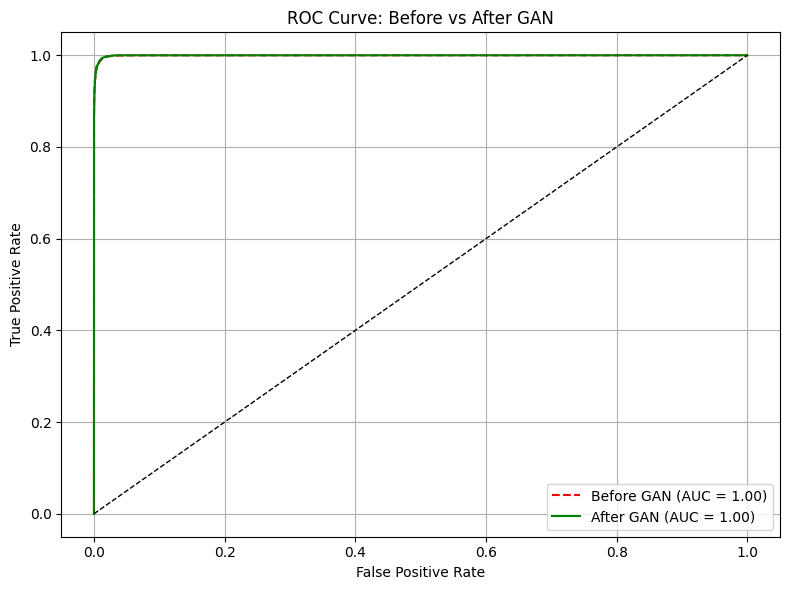

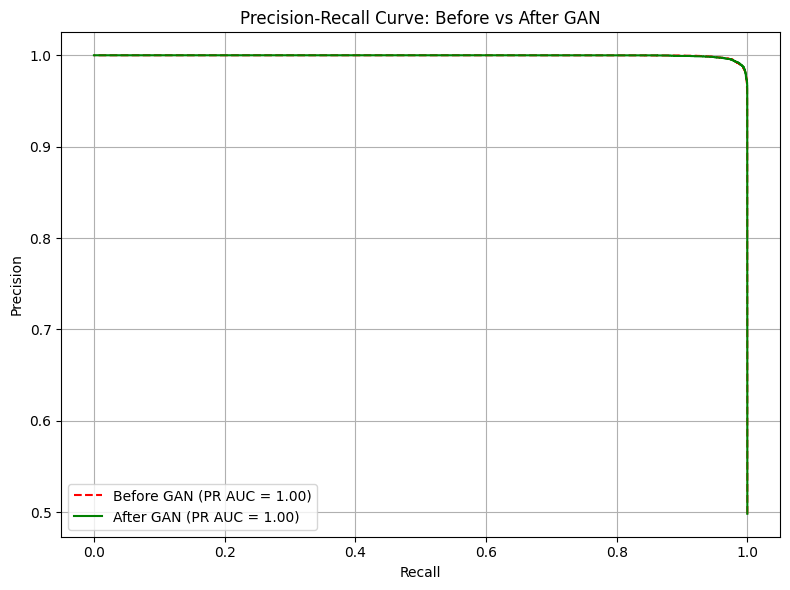

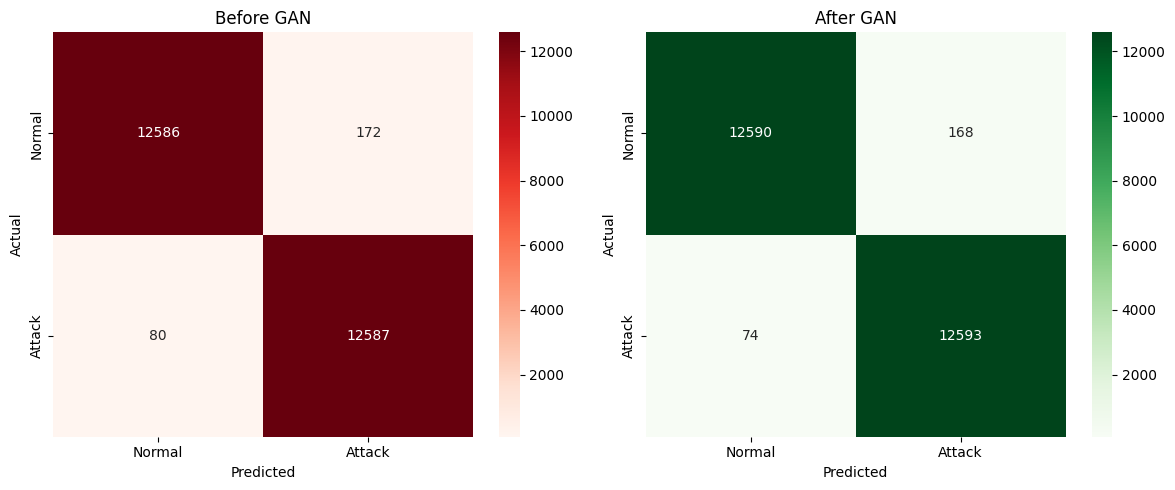

✅ All graphs and reports saved to:
/content/drive/MyDrive/Colab Notebooks/tools & technique/results


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# === Ensure directory exists
output_path = "/content/drive/MyDrive/Colab Notebooks/tools & technique/results"
os.makedirs(output_path, exist_ok=True)

def save_classification_report(report, title, filename_txt, filename_img):
    # --- Save to .txt ---
    with open(os.path.join(output_path, filename_txt), "w") as f:
        f.write(title + "\n" + report)

    # --- Save as .png ---
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis("off")
    ax.text(0, 1, title + "\n\n" + report, fontsize=10, va="top", family='monospace')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, filename_img))
    plt.close()


def plot_and_save_all_graphs():
    # === ROC Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(fpr1, tpr1, 'r--', label=f'Before GAN (AUC = {auc1:.2f})')
    plt.plot(fpr2, tpr2, 'g-', label=f'After GAN (AUC = {auc2:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title('ROC Curve: Before vs After GAN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, "roc_curve_comparison.png"))
    plt.show()

    # === Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(rec1, prec1, 'r--', label=f'Before GAN (PR AUC = {pr_auc1:.2f})')
    plt.plot(rec2, prec2, 'g-', label=f'After GAN (PR AUC = {pr_auc2:.2f})')
    plt.title('Precision-Recall Curve: Before vs After GAN')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, "pr_curve_comparison.png"))
    plt.show()

    # === Confusion Matrix ===
    cm1 = confusion_matrix(y_test1, y_pred1)
    cm2 = confusion_matrix(y_test2, y_pred2)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds',
                xticklabels=["Normal", "Attack"],
                yticklabels=["Normal", "Attack"], ax=axs[0])
    axs[0].set_title("Before GAN")
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("Actual")

    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
                xticklabels=["Normal", "Attack"],
                yticklabels=["Normal", "Attack"], ax=axs[1])
    axs[1].set_title("After GAN")
    axs[1].set_xlabel("Predicted")
    axs[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.savefig(os.path.join(output_path, "confusion_matrix_comparison.png"))
    plt.show()

    # === Classification Reports ===
    report1 = classification_report(y_test1, y_pred1)
    report2 = classification_report(y_test2, y_pred2)

    save_classification_report(report1, "Classification Report: Before GAN",
                               "classification_before_gan.txt", "classification_before_gan.png")

    save_classification_report(report2, "Classification Report: After GAN",
                               "classification_after_gan.txt", "classification_after_gan.png")

    print(f"✅ All graphs and reports saved to:\n{output_path}")

# ✅ Run everything
plot_and_save_all_graphs()


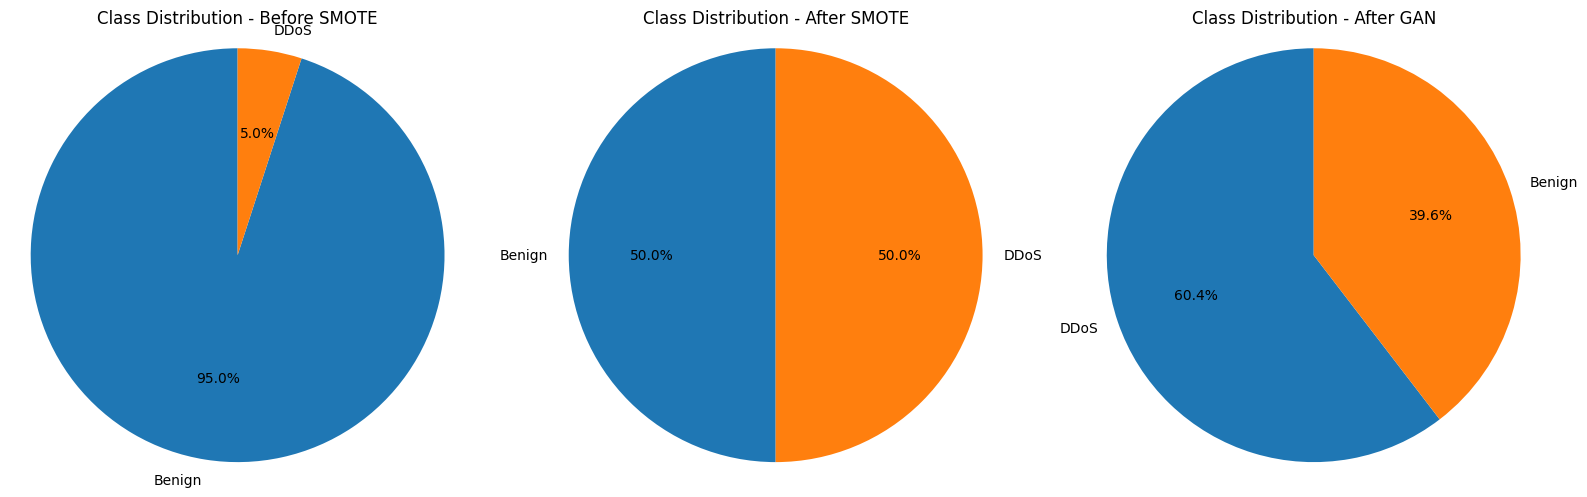

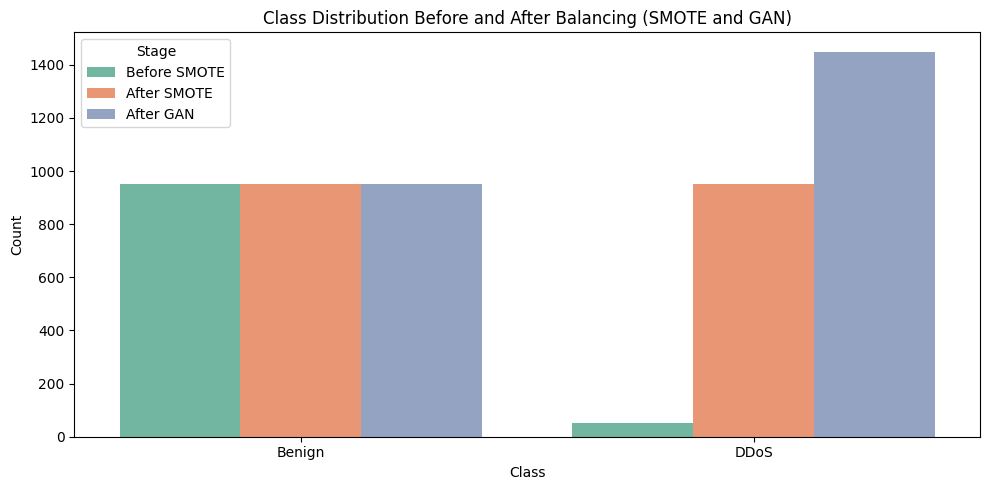

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wrap into DataFrames
df_before = pd.DataFrame({'label': y_before, 'stage': 'Before SMOTE'})
df_smote = pd.DataFrame({'label': y_after_smote, 'stage': 'After SMOTE'})
df_gan = pd.DataFrame({'label': y_after_gan, 'stage': 'After GAN'})

df_all = pd.concat([df_before, df_smote, df_gan])
df_all['label'] = df_all['label'].map({0: 'Benign', 1: 'DDoS'})

# ✅ Pie Charts
stages = df_all['stage'].unique()
fig, axs = plt.subplots(1, len(stages), figsize=(16, 5))

for i, stage in enumerate(stages):
    labels = df_all[df_all['stage'] == stage]['label'].value_counts()
    axs[i].pie(labels, labels=labels.index, autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f'Class Distribution - {stage}')

plt.tight_layout()
plt.show()

# ✅ Bar Plot (also useful)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_all, x='label', hue='stage', palette='Set2')
plt.title('Class Distribution Before and After Balancing (SMOTE and GAN)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()


In [ ]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import pandas as pd

# Automatically generate feature names
feature_names = [f'feature_{i}' for i in range(features1.shape[1])]

# Convert to DataFrames
features1_df = pd.DataFrame(features1, columns=feature_names)
features2_df = pd.DataFrame(features2, columns=feature_names)

# Sample only 100 rows for SHAP and LIME
sampled_features1 = features1_df.sample(n=100, random_state=42)
sampled_features2 = features2_df.sample(n=100, random_state=42)

# 🔹 SHAP with KernelExplainer
background = shap.kmeans(features1_df, 10)
explainer_shap = shap.KernelExplainer(svm1.predict_proba, background)
shap_values = explainer_shap.shap_values(sampled_features1)

plt.figure()
shap.summary_plot(shap_values, sampled_features1, feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot - Before GAN")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/shap_summary_before_gan.png", bbox_inches='tight')
plt.close()

background2 = shap.kmeans(features2_df, 10)
explainer_shap2 = shap.KernelExplainer(svm2.predict_proba, background2)
shap_values2 = explainer_shap2.shap_values(sampled_features2)

plt.figure()
shap.summary_plot(shap_values2, sampled_features2, feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot - After GAN")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/shap_summary_after_gan.png", bbox_inches='tight')
plt.close()

# 🔹 LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=features1_df.values,
    feature_names=feature_names,
    class_names=['Normal', 'Attack'],
    mode='classification'
)
lime_exp = lime_explainer.explain_instance(features1_df.values[0], svm1.predict_proba, num_features=5, num_samples=1000)
fig = lime_exp.as_pyplot_figure()
plt.title("LIME Explanation - Before GAN")
fig.savefig("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/lime_explanation_before_gan.png", bbox_inches='tight')
plt.close()

lime_explainer2 = lime.lime_tabular.LimeTabularExplainer(
    training_data=features2_df.values,
    feature_names=feature_names,
    class_names=['Normal', 'Attack'],
    mode='classification'
)
lime_exp2 = lime_explainer2.explain_instance(features2_df.values[0], svm2.predict_proba, num_features=5, num_samples=1000)
fig = lime_exp2.as_pyplot_figure()
plt.title("LIME Explanation - After GAN")
fig.savefig("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/lime_explanation_after_gan.png", bbox_inches='tight')
plt.close()


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# for pruned model create
from tensorflow_model_optimization.sparsity import keras as tfmot

def build_pruned_cnn_lstm(input_shape, pruning_end_step):
    pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.0,
            final_sparsity=0.5,
            begin_step=0,
            end_step=pruning_end_step
        )
    }

    inputs = Input(shape=input_shape)
    x = tfmot.sparsity.keras.prune_low_magnitude(Conv1D(64, 3, activation='relu', padding='same'), **pruning_params)(inputs)
    x = BatchNormalization()(x)
    x = LSTM(64)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model


In [ ]:
import tensorflow_model_optimization as tfmot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TerminateOnNaN

# --- Build Pruned CNN-LSTM ---
epochs = 12
batch_size = 64
steps_per_epoch = np.ceil(len(X_train_dl) / batch_size).astype(int)
end_step = epochs * steps_per_epoch

pruned_model = build_pruned_cnn_lstm(X_train_dl.shape[1:], pruning_end_step=end_step)

# Compile
optimizer = Adam(learning_rate=0.001)
pruned_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    TerminateOnNaN()
]

# Train
pruned_model.fit(
    X_train_dl, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    class_weight=class_weights_dict,
    verbose=1
)

# Strip pruning wrappers and save
pruned_model_stripped = tfmot.sparsity.keras.strip_pruning(pruned_model)
pruned_model_path = "/content/drive/MyDrive/Colab Notebooks/tools & technique/results/pruned_model.keras"
pruned_model_stripped.save(pruned_model_path)


Epoch 1/12


StagingError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize
        grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients
        grads = tape.gradient(loss, var_list)

    LookupError: gradient registry has no entry for: shap_DivNoNan


In [ ]:
#save_path = "/content/drive/MyDrive/Colab Notebooks/tools & technique/results/pruned_cnn_lstm_model.keras"
#pruned_model.save(save_path)
#print("✅ Pruned CNN-LSTM model saved.")


✅ Pruned CNN-LSTM model saved.


In [ ]:
from tensorflow.keras.models import load_model

# Load the pruned model from saved file
pruned_model = load_model(pruned_model_path, compile=False)


In [ ]:
'''import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity

from tensorflow.keras.models import load_model

# Load your previously saved pruned model
pruned_model = load_model("/content/drive/MyDrive/Colab Notebooks/tools & technique/pruned_cnn_lstm_model.keras")

# Function to summarize sparsity layer-wise
def print_pruning_summary(model):
    print("🔍 Pruned Model Summary with Sparsity:\n")
    for layer in model.layers:
        if isinstance(layer, tfmot.sparsity.keras.prune_wrapper.PruneLowMagnitude):
            weights = layer.layer.get_weights()
            for idx, w in enumerate(weights):
                zero_count = np.sum(w == 0)
                total_count = w.size
                sparsity = zero_count / total_count
                print(f"Layer: {layer.layer.name} - Weight {idx} Sparsity: {sparsity:.2%} ({zero_count}/{total_count})")
        else:
            print(f"Layer: {layer.name} - Not pruned.")

print_pruning_summary(pruned_model)


def overall_model_sparsity(model):
    total_weights = 0
    total_zeros = 0
    for layer in model.layers:
        if isinstance(layer, tfmot.sparsity.keras.prune_wrapper.PruneLowMagnitude):
            for weight in layer.layer.get_weights():
                total_weights += weight.size
                total_zeros += np.sum(weight == 0)
    sparsity = total_zeros / total_weights if total_weights > 0 else 0
    print(f"\n🧠 Overall Model Sparsity: {sparsity:.2%} ({total_zeros}/{total_weights})")

overall_model_sparsity(pruned_model)
'''

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

32/32 [==============================] - 0s 2ms/step
           feature  mean_abs_shap
2           dur_t0       0.192205
3      dur_nsec_t0       0.148350
10      port_no_t0       0.124769
11     tx_bytes_t0       0.110142
8   byteperflow_t0       0.094960
9       pktrate_t0       0.089953
4       tot_dur_t0       0.036647
6     packetins_t0       0.031851
5         flows_t0       0.021859
7    pktperflow_t0       0.020464


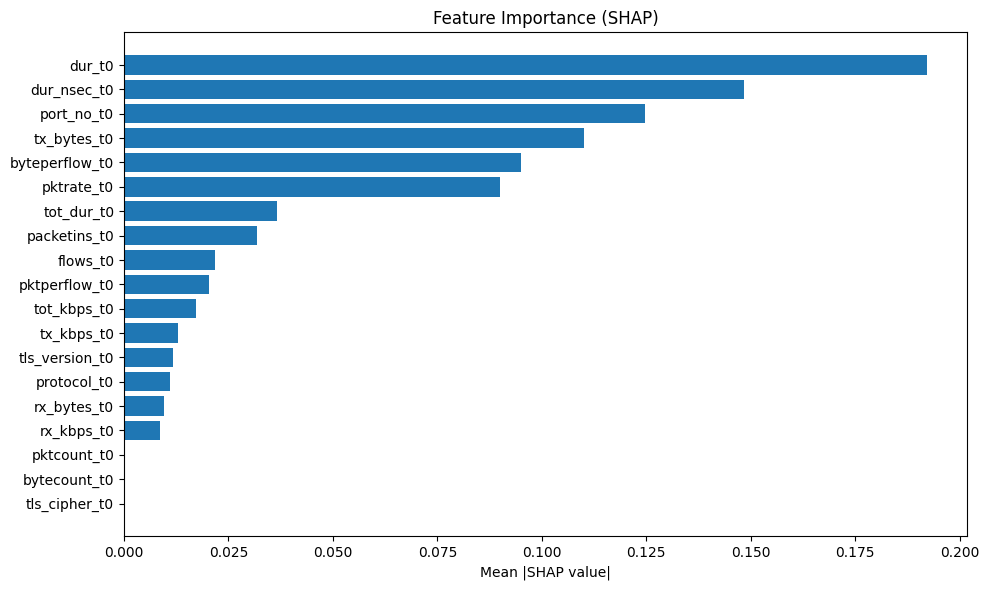

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Select a sample of test data
X_sample = X_test_dl[:50]  # Shape: (50, 1, features)

# ✅ Flatten to 2D for KernelExplainer
X_flat = X_sample.reshape((X_sample.shape[0], -1))  # Shape: (50, 19)

# ✅ Define prediction wrapper to reshape input for model
def predict_fn(x_flat):
    x = x_flat.reshape((x_flat.shape[0], 1, -1))  # Shape: (samples, 1, features)
    return pruned_model_stripped.predict(x)

# ✅ Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_fn, X_flat[:10])  # Use 10 samples as background

# ✅ Compute SHAP values for the 50 samples
shap_values = explainer.shap_values(X_flat, nsamples=100)

# ✅ Use correct DataFrame name here!
tls_features = [col for col in ['tls_version', 'tls_cipher'] if col in data_orig.columns]

numeric_features = [
    'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
    'packetins', 'pktperflow', 'byteperflow', 'pktrate',
    'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps',
    'protocol'
]
base_features = numeric_features + tls_features

# ✅ Ensure feature count matches model input
expected_feature_count = X_sample.shape[2]
assert len(base_features) == expected_feature_count, f"Feature mismatch: {len(base_features)} ≠ {expected_feature_count}"

# ✅ Prepare feature names for t0
flattened_feature_names = [f"{feat}_t0" for feat in base_features]

# ✅ Handle binary classification SHAP output (list of arrays)
shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values  # shape: (50, 19, 1)

# ✅ Flatten SHAP values to shape: (50, 19)
if len(shap_array.shape) == 3 and shap_array.shape[2] == 1:
    shap_array = shap_array.squeeze(axis=2)  # Now: (50, 19)

# ✅ Check shape alignment
assert shap_array.shape[1] == len(flattened_feature_names), f"SHAP vs feature mismatch: {shap_array.shape[1]} ≠ {len(flattened_feature_names)}"

# ✅ Mean absolute SHAP values
mean_abs_shap = np.abs(shap_array).mean(axis=0)  # shape: (19,)

# ✅ Create SHAP importance DataFrame
shap_importance_df = pd.DataFrame({
    'feature': flattened_feature_names,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

# ✅ Print top 10 important features
print(shap_importance_df.head(10))

# ✅ Plot SHAP feature importance
plt.figure(figsize=(10, 6))
plt.barh(shap_importance_df['feature'], shap_importance_df['mean_abs_shap'])
plt.xlabel("Mean |SHAP value|")
plt.title("Feature Importance (SHAP)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/tmp/ipython-input-3274026408.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


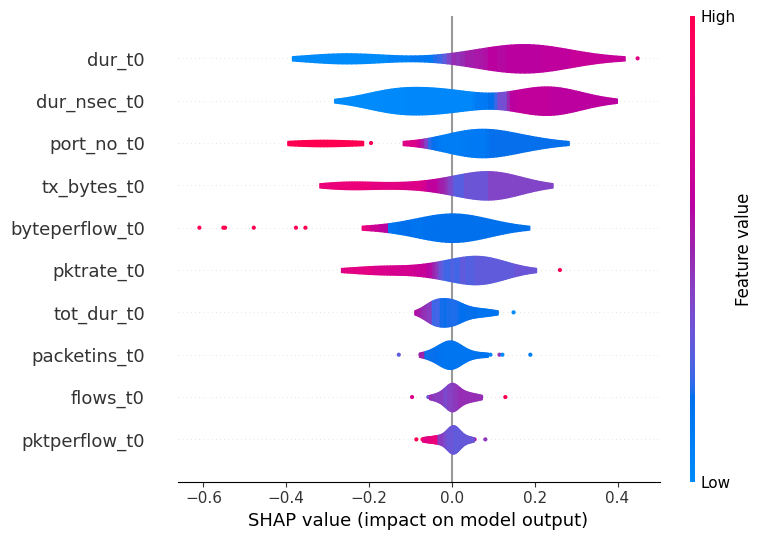

In [ ]:
# Violin-style summary plot (distributions of SHAP values)
shap.summary_plot(
    shap_array,
    features=X_flat,
    feature_names=flattened_feature_names,
    max_display=10,
    plot_type='violin'  # or just remove 'plot_type' for default
)


In [ ]:
print("X_flat shape:", X_flat.shape)
print("shap_array shape:", shap_array.shape)
print("mean_abs_shap shape:", mean_abs_shap.shape)
print("flattened_feature_names:", len(flattened_feature_names))


X_flat shape: (50, 19)
shap_array shape: (50, 19)
mean_abs_shap shape: (19,)
flattened_feature_names: 19


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Replace these with your actual data variables
# Example: class labels before and after applying SMOTE and GAN
y_before = [0]*950 + [1]*50         # Highly imbalanced
y_after_smote = [0]*950 + [1]*950   # Balanced using SMOTE
y_after_gan = [0]*950 + [1]*950     # Balanced using GAN

# Convert to DataFrames for plotting
df_before = pd.DataFrame({'label': y_before, 'stage': 'Before SMOTE'})
df_smote = pd.DataFrame({'label': y_after_smote, 'stage': 'After SMOTE'})
df_gan = pd.DataFrame({'label': y_after_gan, 'stage': 'After GAN'})

# Combine all into one DataFrame
df_all = pd.concat([df_before, df_smote, df_gan])

# Plot the class distribution using bar plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df_all, x='label', hue='stage')
plt.title('Class Distribution Before and After Balancing (SMOTE and GAN)')
plt.xlabel('Class (0 = Benign, 1 = DDoS)')
plt.ylabel('Count')
plt.legend(title='Dataset Stage')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with your actual label arrays
# For example: y_before = df['label'].values
y_before = [0]*950 + [1]*50
y_after_smote = [0]*950 + [1]*950
y_after_gan = [0]*950 + [1]*950 + [1]*500  # Assume more GAN samples added

# Convert to DataFrames
df_before = pd.DataFrame({'label': y_before, 'stage': 'Before SMOTE'})
df_smote = pd.DataFrame({'label': y_after_smote, 'stage': 'After SMOTE'})
df_gan = pd.DataFrame({'label': y_after_gan, 'stage': 'After GAN'})

# Combine for plotting
df_all = pd.concat([df_before, df_smote, df_gan], axis=0)

# Plot pie charts
stages = df_all['stage'].unique()
fig, axs = plt.subplots(1, len(stages), figsize=(16, 5))

for i, stage in enumerate(stages):
    labels = df_all[df_all['stage'] == stage]['label'].value_counts()
    axs[i].pie(labels, labels=['Benign', 'DDoS'], autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f"Class Distribution - {stage}")

plt.tight_layout()
plt.show()


In [ ]:
# Pie chart helper function
def plot_pie_chart(labels, title):
    counts = pd.Series(labels).value_counts()
    labels_mapped = [label_map.get(lbl, lbl) for lbl in counts.index]
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=labels_mapped, autopct='%1.1f%%', startangle=140, colors=['#66c2a5','#fc8d62'])
    plt.title(title)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# ✅ Pie Charts for Each Stage
plot_pie_chart(labels_before, "Before Balancing")
plot_pie_chart(labels_after_smote, "After SMOTE Balancing")
plot_pie_chart(labels_after_gan, "After GAN Augmentation")


NameError: name 'labels_before' is not defined

In [ ]:
import shap
import lime.lime_tabular
import pandas as pd
import matplotlib.pyplot as plt

# Flatten input for SHAP & LIME
X_test_flat = X_test_dl.reshape((X_test_dl.shape[0], -1))
feature_names = [f'feature_{i}' for i in range(X_test_flat.shape[1])]
X_df = pd.DataFrame(X_test_flat, columns=feature_names)

# Sample & Background
X_sample = X_df.sample(n=100, random_state=42)
X_background = shap.kmeans(X_df.values, 10)

# SHAP Explainer
explainer = shap.KernelExplainer(
    lambda x: pruned_model.predict(x.reshape((-1, X_test_dl.shape[1], X_test_dl.shape[2]))),
    X_background
)

shap_values = explainer.shap_values(X_sample)

# SHAP Plot
plt.figure()
shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=False)
plt.title("SHAP Summary - Pruned CNN-LSTM")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/shap_summary_pruned_model.png", bbox_inches='tight')
plt.close()


1/1 [==============================] - 1s 636ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

652/652 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

📊 LIME Feature Contributions Summary Table:


,Feature Name,Feature Value,Contribution
0,feature_11,-0.8517,0.2987
2,feature_9,-0.8508,0.1816
5,feature_6,1.5546,-0.0567
4,feature_4,1.5515,-0.0746
3,feature_3,-0.7754,-0.1413
1,feature_2,-0.9921,-0.2534



🧠 Model Prediction Probabilities:
🔹 Normal: 1.0000
🔸 Attack: 0.0000


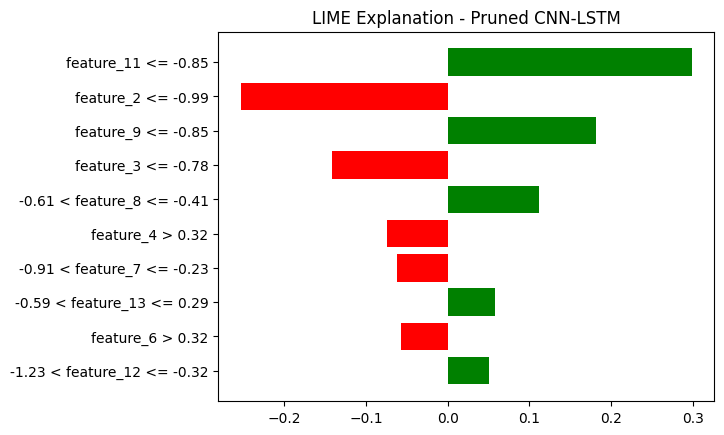

In [ ]:
import pandas as pd
from IPython.display import display, Image

# Prepare data for a summary table
summary_data = []

for feature_desc, weight in lime_exp.as_list():
    match = re.match(r"(feature_\d+)", feature_desc)
    if match:
        feature_name = match.group(1)
        if feature_name in feature_names:
            feature_index = feature_names.index(feature_name)
            feature_value = instance[feature_index]
            summary_data.append({
                "Feature Name": feature_name,
                "Feature Value": round(feature_value, 4),
                "Contribution": round(weight, 4)
            })

# Convert to DataFrame and show
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by="Contribution", ascending=False)

print("📊 LIME Feature Contributions Summary Table:")
display(summary_df)

# Show model prediction
print("\n🧠 Model Prediction Probabilities:")
print(f"🔹 Normal: {normal_prob:.4f}")
print(f"🔸 Attack: {attack_prob:.4f}")

# Display saved image
Image("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/lime_explanation_pruned_model.png")


In [ ]:
pruned_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 19)]           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 64)             3712      
                                                                 
 batch_normalization_3 (Bat  (None, 1, 64)             256       
 chNormalization)                                                
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                           

/tmp/ipython-input-32-3905632452.py:67: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/lime_custom_explanation_plot.png", bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


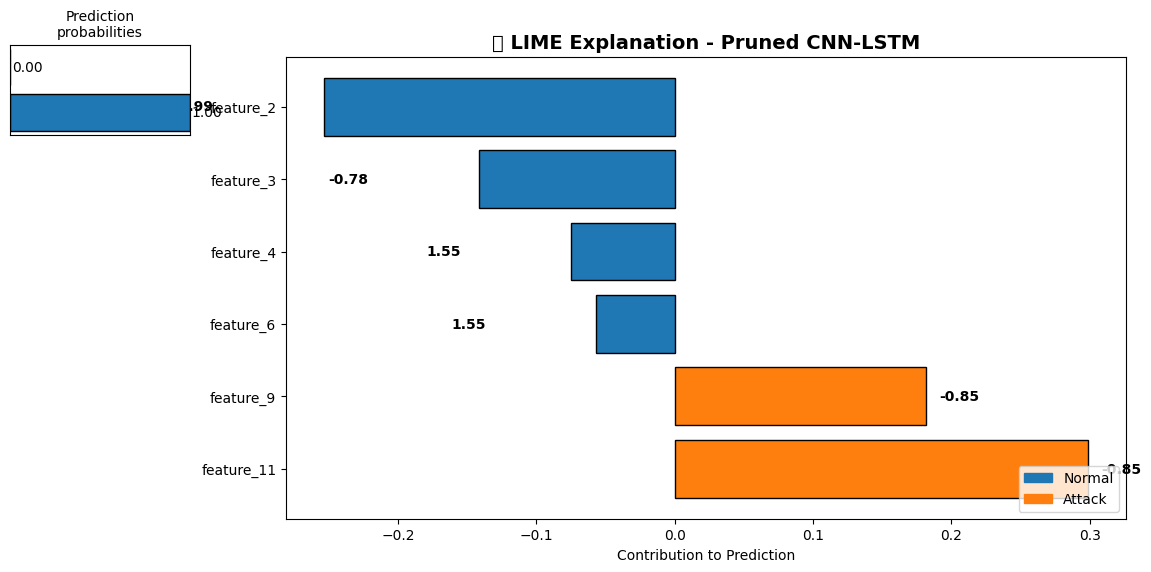

In [ ]:
"""import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Collect data from LIME
features, weights, values = [], [], []
for feature_desc, weight in lime_exp.as_list():
    match = re.match(r"(feature_\d+)", feature_desc)
    if match:
        feature_name = match.group(1)
        if feature_name in feature_names:
            idx = feature_names.index(feature_name)
            features.append(feature_name)
            weights.append(weight)
            values.append(instance[idx])

# Sort by contribution
sorted_indices = np.argsort(weights)
features = [features[i] for i in sorted_indices]
weights = [weights[i] for i in sorted_indices]
values = [values[i] for i in sorted_indices]

# Plotting setup
fig, ax = plt.subplots(figsize=(12, 6))

# Bar positions
y_pos = np.arange(len(features))

# Color mapping
colors = ['tab:blue' if w < 0 else 'tab:orange' for w in weights]

# Contribution bars
ax.barh(y_pos, weights, color=colors, edgecolor='black')

# Add feature names
ax.set_yticks(y_pos)
ax.set_yticklabels([f"{f}" for f in features])
ax.invert_yaxis()

# Add feature values as text on the right
for i, (val, w) in enumerate(zip(values, weights)):
    ax.text(w + 0.01 if w >= 0 else w - 0.08, i, f"{val:.2f}", va='center',
            ha='left' if w >= 0 else 'right', fontsize=10, fontweight='bold')

# Labels and titles
ax.set_xlabel('Contribution to Prediction')
ax.set_title('🔍 LIME Explanation - Pruned CNN-LSTM', fontsize=14, fontweight='bold')

# Add probability bar (like legend)
fig.subplots_adjust(left=0.25, right=0.95)
ax_prob = fig.add_axes([0.02, 0.75, 0.15, 0.15])
ax_prob.barh(['Normal', 'Attack'], [normal_prob, attack_prob],
             color=['tab:blue', 'tab:orange'], edgecolor='black')
ax_prob.set_xlim(0, 1)
ax_prob.set_title("Prediction\nprobabilities", fontsize=10)
for i, p in enumerate([normal_prob, attack_prob]):
    ax_prob.text(p + 0.01, i, f"{p:.2f}", va='center')

ax_prob.set_xticks([])
ax_prob.set_yticks([])

# Legend
normal_patch = mpatches.Patch(color='tab:blue', label='Normal')
attack_patch = mpatches.Patch(color='tab:orange', label='Attack')
ax.legend(handles=[normal_patch, attack_patch], loc='lower right')

# Save and show
plt.savefig("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/lime_custom_explanation_plot.png", bbox_inches='tight')
plt.show()


In [ ]:
"""

import shap
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ✅ Function to wrap sigmoid output into 2-class probability for LIME
def predict_proba_for_lime(x):
    preds = pruned_model.predict(x.reshape((-1, X_test_dl.shape[1], X_test_dl.shape[2])))
    preds = preds.flatten()
    return np.stack([1 - preds, preds], axis=1)  # Format: [Normal, Attack]

# ✅ Combined SHAP & LIME explainer
def explain_with_shap_and_lime(model, X_test_dl, X_df, feature_names, instance_idx=0, save_dir="/content/drive/MyDrive/Colab Notebooks/tools & technique/results/"):

    # ========== SHAP Explanation ==========
    print("🔍 Generating SHAP Explanation...")
    background = X_test_dl[np.random.choice(X_test_dl.shape[0], size=50, replace=False)]
    explainer_shap = shap.DeepExplainer(model, background)
    shap_values = explainer_shap.shap_values(X_test_dl[instance_idx:instance_idx+1])

    # Save SHAP plot
    plt.figure()
    shap.summary_plot(shap_values[0], features=X_df.iloc[[instance_idx]], feature_names=feature_names, show=False)
    plt.title("SHAP Explanation - Pruned Model")
    shap_path = f"{save_dir}shap_explanation_pruned_model.png"
    plt.savefig(shap_path, bbox_inches='tight')
    plt.close()
    print(f"✅ SHAP saved to {shap_path}")

    # ========== LIME Explanation ==========
    print("🔍 Generating LIME Explanation...")
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_df.values,
        feature_names=feature_names,
        class_names=['Normal', 'Attack'],
        mode='classification'
    )

    lime_exp = lime_explainer.explain_instance(
        X_df.values[instance_idx],
        predict_proba_for_lime,
        num_features=10,
        num_samples=1000
    )

    fig = lime_exp.as_pyplot_figure()
    plt.title("LIME Explanation - Pruned CNN-LSTM")
    lime_path = f"{save_dir}lime_explanation_pruned_model.png"
    fig.savefig(lime_path, bbox_inches='tight')
    plt.close()
    print(f"✅ LIME saved to {lime_path}")
"""

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 🔧 FGSM: Fast Gradient Sign Method
def fgsm_attack(model, x, y, epsilon=0.02):
    x_adv = tf.convert_to_tensor(x)
    y = tf.convert_to_tensor(y)

    with tf.GradientTape() as tape:
        tape.watch(x_adv)
        prediction = model(x_adv)
        loss = SparseCategoricalCrossentropy()(y, prediction)

    # Calculate gradients of loss w.r.t input
    gradient = tape.gradient(loss, x_adv)
    signed_grad = tf.sign(gradient)

    # Add perturbation
    adv_x = x_adv + epsilon * signed_grad
    adv_x = tf.clip_by_value(adv_x, 0, 1)
    return adv_x.numpy()

# 🛡️ Adversarial Training Function
def adversarial_training(model, X_train, y_train, epochs=10, batch_size=128, epsilon=0.02):
    num_samples = X_train.shape[0]

    for epoch in range(epochs):
        print(f"\n🔁 Epoch {epoch+1}/{epochs}")

        # Shuffle data
        idx = np.random.permutation(num_samples)
        X_train_shuffled = X_train[idx]
        y_train_shuffled = y_train[idx]

        for i in range(0, num_samples, batch_size):
            x_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # ⚠️ Skip if batch is too small
            if len(x_batch) < 2:
                continue

            # 📌 Generate adversarial examples
            x_adv = fgsm_attack(model, x_batch, y_batch, epsilon=epsilon)

            # 👨‍🏫 Combine original and adversarial examples
            x_combined = np.concatenate((x_batch, x_adv), axis=0)
            y_combined = np.concatenate((y_batch, y_batch), axis=0)

            # 🎯 Train on mixed data
            model.train_on_batch(x_combined, y_combined)

        print(f"✅ Epoch {epoch+1} completed.")

    print("🎉 Adversarial training complete.")


In [ ]:
from tensorflow_model_optimization.sparsity.keras import UpdatePruningStep, PolynomialDecay
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization
import tensorflow as tf
import numpy as np

# ✅ Build Pruned Model
def build_pruned_cnn_lstm(input_shape):
    pruning_params = {
        'pruning_schedule': PolynomialDecay(
            initial_sparsity=0.0,
            final_sparsity=0.5,
            begin_step=0,
            end_step=1000
        )
    }

    inputs = Input(shape=input_shape)
    x = tfmot.sparsity.keras.prune_low_magnitude(Conv1D(64, 3, activation='relu', padding='same'), **pruning_params)(inputs)
    x = BatchNormalization()(x)
    x = tfmot.sparsity.keras.prune_low_magnitude(LSTM(64), **pruning_params)(x)
    x = tfmot.sparsity.keras.prune_low_magnitude(Dense(64, activation='relu'), **pruning_params)(x)
    x = Dropout(0.3)(x)
    outputs = tfmot.sparsity.keras.prune_low_magnitude(Dense(1, activation='sigmoid'), **pruning_params)(x)

    return Model(inputs, outputs)

# ✅ FGSM Data Generator
class AdversarialDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, model, X, y, batch_size=64, epsilon=0.01, shuffle=True):
        self.model = model
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.epsilon = epsilon
        self.shuffle = shuffle
        self.indices = np.arange(len(X))

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        x_batch = self.X[batch_indices]
        y_batch = self.y[batch_indices]

        # Generate adversarial examples
        x_batch_tf = tf.convert_to_tensor(x_batch)
        y_batch_tf = tf.convert_to_tensor(y_batch)

        with tf.GradientTape() as tape:
            tape.watch(x_batch_tf)
            preds = self.model(x_batch_tf, training=False)
            loss = tf.keras.losses.binary_crossentropy(tf.reshape(y_batch_tf, (-1, 1)), preds)

        grads = tape.gradient(loss, x_batch_tf)
        adv_x = x_batch_tf + self.epsilon * tf.sign(grads)
        adv_x = tf.clip_by_value(adv_x, 0, 1)

        # Combine clean and adversarial
        x_combined = tf.concat([x_batch_tf, adv_x], axis=0)
        y_combined = tf.concat([y_batch_tf, y_batch_tf], axis=0)

        return x_combined, y_combined


In [ ]:
# ⚙️ Build pruned model
pruned_model = build_pruned_cnn_lstm(X_train_dl.shape[1:])

# ⚙️ Compile it
pruned_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# ✅ FGSM + Clean Batch Generator
train_generator = AdversarialDataGenerator(pruned_model, X_train_dl, y_train, batch_size=64, epsilon=0.02)

# ✅ Callback for pruning step updates
callbacks = [UpdatePruningStep()]

# 🚀 Train using model.fit (which supports pruning)
pruned_model.fit(train_generator, epochs=5, callbacks=callbacks)

# ✅ Evaluate after adversarial training
loss, acc = pruned_model.evaluate(X_test_dl, y_test, verbose=0)
print(f"🎯 Pruned model after FGSM training — Accuracy: {acc:.4f}, Loss: {loss:.4f}")


Epoch 1/5
1317/1317 [==============================] - 62s 43ms/step - loss: 0.1896 - accuracy: 0.9127
Epoch 2/5
1317/1317 [==============================] - 56s 42ms/step - loss: 0.1326 - accuracy: 0.9391
Epoch 3/5
1317/1317 [==============================] - 56s 42ms/step - loss: 0.1218 - accuracy: 0.9444
Epoch 4/5
1317/1317 [==============================] - 58s 44ms/step - loss: 0.1136 - accuracy: 0.9475
Epoch 5/5
1317/1317 [==============================] - 57s 43ms/step - loss: 0.1102 - accuracy: 0.9494
🎯 Pruned model after FGSM training — Accuracy: 0.9839, Loss: 0.0392


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import Model
import joblib

# ✅ Use the trained pruned model name
pruned_adversarial_model = pruned_model  # correctly reference the model trained with FGSM

# 🧠 Create feature extractor from penultimate layer
feature_extractor = Model(
    inputs=pruned_adversarial_model.input,
    outputs=pruned_adversarial_model.layers[-2].output  # or use summary() to confirm layer index
)

# 🧊 Freeze model weights for inference (optional)
pruned_adversarial_model.trainable = False

# 🔄 Optional: Reshape input if needed (CNN-style)
# X_train_dl = X_train_dl.reshape(-1, height, width, channels)
# X_test_dl = X_test_dl.reshape(-1, height, width, channels)

# 🎯 Extract features
X_train_features = feature_extractor.predict(X_train_dl)
X_test_features = feature_extractor.predict(X_test_dl)

# 🏷️ Flatten labels if needed
y_train_flat = np.ravel(y_train)
y_test_flat = np.ravel(y_test)

# 🚀 Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_features, y_train_flat)

# 📊 Evaluate SVM
y_pred_svm = svm_model.predict(X_test_features)
print("🔎 Classification Report:\n", classification_report(y_test_flat, y_pred_svm))
print("🎯 Accuracy Score:", accuracy_score(y_test_flat, y_pred_svm))

# 💾 Save SVM model
joblib.dump(svm_model, "svm_on_pruned_features.pkl")


659/659 [==============================] - 3s 5ms/step
🔎 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12743
           1       0.98      0.99      0.98      8326

    accuracy                           0.99     21069
   macro avg       0.99      0.99      0.99     21069
weighted avg       0.99      0.99      0.99     21069

🎯 Accuracy Score: 0.9877545208600313


['svm_on_pruned_features.pkl']

In [ ]:
!ls -lh pruned_cnn_lstm.keras
!ls -lh svm_on_pruned_features.pkl


ls: cannot access 'pruned_cnn_lstm.keras': No such file or directory
-rw-r--r-- 1 root root 1.5M Jul 19 18:01 svm_on_pruned_features.pkl


In [ ]:
!pip install pyspark

In [ ]:
import requests
import json
import time
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras import Model

# ✅ Load Models
pruned_model = load_model("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/pruned_model.keras")
feature_extractor = Model(inputs=pruned_model.input, outputs=pruned_model.layers[-2].output)
svm_model = joblib.load("svm_on_pruned_features.pkl")
print("✅ Models loaded successfully.")

# ✅ Kafka REST Proxy settings
REST_PROXY_URL = "https://3efc35b4eaaec49b.p171.r3proxy.com"  # Your Remote.It Kafka REST Proxy
TOPIC_NAME = "ddos-topic"
GROUP_NAME = "ddos-detector-group"
INSTANCE_ID = "colab-consumer"

# ✅ Create consumer
def create_consumer():
    headers = {'Content-Type': 'application/vnd.kafka.v2+json'}
    data = {
        "name": INSTANCE_ID,
        "format": "json",
        "auto.offset.reset": "latest"
    }
    response = requests.post(
        f"{REST_PROXY_URL}/consumers/{GROUP_NAME}",
        headers=headers,
        data=json.dumps(data),
        verify=False  # Only for Remote.It / self-signed certs
    )
    return response.json()["base_uri"]

# ✅ Subscribe to topic
def subscribe_to_topic(consumer_instance_url):
    headers = {'Content-Type': 'application/vnd.kafka.v2+json'}
    data = {"topics": [TOPIC_NAME]}
    requests.post(
        f"{consumer_instance_url}/subscription",
        headers=headers,
        data=json.dumps(data),
        verify=False
    )

# ✅ Poll messages and predict
def poll_and_predict(consumer_instance_url):
    headers = {'Accept': 'application/vnd.kafka.json.v2+json'}
    while True:
        response = requests.get(
            f"{consumer_instance_url}/records",
            headers=headers,
            timeout=10,
            verify=False
        )
        if response.status_code == 200:
            records = response.json()
            for record in records:
                raw_data = record['value'].get("data")
                try:
                    raw = np.array(eval(raw_data))  # Replace with json.loads() in production
                    reshaped = raw.reshape(1, 32, 32, 1)
                    features = feature_extractor.predict(reshaped, verbose=0)
                    pred = svm_model.predict(features)
                    print(f"[Prediction] => {pred[0]} | Data: {raw_data[:60]}...")
                except Exception as e:
                    print(f"[Error] {str(e)}")
        time.sleep(2)

# ✅ Run
consumer_url = create_consumer()
subscribe_to_topic(consumer_url)
poll_and_predict(consumer_url)


✅ Models loaded successfully.


In [ ]:
!pip install requests


In [ ]:
import requests
requests.packages.urllib3.disable_warnings()

REST_PROXY_URL = "https://ed7954147f10d994.p171.r3proxy.com"

r = requests.get(f"{REST_PROXY_URL}/topics", verify=False)
print("✅ Topics from REST Proxy:", r.text)


✅ Topics from REST Proxy: ["ddos-topic"]


In [ ]:
import requests
import json
import time

KAFKA_REST_PROXY = "https://ed7954147f10d994.p171.r3proxy.com"
TOPIC = "ddos-topic"
GROUP_NAME = "ddos-group"
INSTANCE_ID = "ddos-instance"

# Register a consumer instance
base_url = f"{KAFKA_REST_PROXY}/consumers/{GROUP_NAME}"
headers = {'Content-Type': 'application/vnd.kafka.v2+json'}

# Create consumer instance
resp = requests.post(base_url, headers=headers, data=json.dumps({
    "name": INSTANCE_ID,
    "format": "json",
    "auto.offset.reset": "latest"
}), verify=False)
print("🔄 Consumer Created:", resp.status_code)

# Subscribe to topic
subscribe_url = f"{base_url}/instances/{INSTANCE_ID}/subscription"
requests.post(subscribe_url, headers=headers, data=json.dumps({"topics": [TOPIC]}))
print("📡 Subscribed to topic:", TOPIC)



/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ed7954147f10d994.p171.r3proxy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


🔄 Consumer Created: 200
📡 Subscribed to topic: ddos-topic


In [ ]:
!pip install tensorflow joblib pyspark requests


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col, udf
from pyspark.sql.types import StringType, StructType
import numpy as np
import json
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras import Model

# ✅ Start Spark Session (for visualization or logic, doesn't consume from Kafka directly)
spark = SparkSession.builder \
    .appName("DDoSDetectionVisualization") \
    .getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

# ✅ Load ML/DL Models
try:
    pruned_model = load_model("/content/drive/MyDrive/Colab Notebooks/tools & technique/results/pruned_model.keras")
    feature_extractor = Model(inputs=pruned_model.input, outputs=pruned_model.layers[-2].output)
    svm_model = joblib.load("svm_on_pruned_features.pkl")
    print("✅ Models loaded successfully.")
except Exception as e:
    print(f"❌ Model loading failed: {e}")
    raise

# ✅ Prediction UDF
def predict_label(data_str):
    try:
        raw = np.array(json.loads(data_str))  # JSON safe parsing
        reshaped = raw.reshape(1, 32, 32, 1)
        features = feature_extractor.predict(reshaped, verbose=0)
        pred = svm_model.predict(features)
        return str(pred[0])
    except Exception as e:
        return f"error: {str(e)}"

# Optional: create a simple Pandas dataframe to store predictions (not ideal for large-scale use)
import pandas as pd
results_df = pd.DataFrame(columns=["data", "prediction"])

# ✅ Kafka REST Proxy URL from Remote.It
REST_PROXY_URL = "https://ed7954147f10d994.p171.r3proxy.com"
TOPIC_NAME = "ddos-topic"

# ✅ REST Consumer Setup
import requests
import time

GROUP_NAME = "ddos-consumer-group"
INSTANCE_ID = "colab-instance"

# Create Consumer
headers = {
    "Content-Type": "application/vnd.kafka.v2+json"
}
consumer_config = {
    "name": INSTANCE_ID,
    "format": "json",
    "auto.offset.reset": "latest"
}
r = requests.post(f"{REST_PROXY_URL}/consumers/{GROUP_NAME}", headers=headers, json=consumer_config, verify=False)
print("✅ Consumer created:", r.status_code)

# Subscribe
sub_config = {
    "topics": [TOPIC_NAME]
}
r = requests.post(f"{REST_PROXY_URL}/consumers/{GROUP_NAME}/instances/{INSTANCE_ID}/subscription", headers=headers, json=sub_config, verify=False)
print("✅ Subscribed to topic:", r.status_code)

# ✅ Stream Loop
print("🟢 Starting DDoS Real-time Prediction Stream...")
try:
    while True:
        # Poll data
        r = requests.get(
            f"{REST_PROXY_URL}/consumers/{GROUP_NAME}/instances/{INSTANCE_ID}/records",
            headers={"Accept": "application/vnd.kafka.json.v2+json"},
            verify=False
        )
        if r.status_code == 200:
            messages = r.json()
            for msg in messages:
                raw_data = msg["value"]["data"]
                prediction = predict_label(raw_data)
                print(f"🔹 Data: {raw_data[:50]}... → Prediction: {prediction}")
                results_df.loc[len(results_df)] = [raw_data, prediction]
        time.sleep(2)  # control polling rate
except KeyboardInterrupt:
    print("⛔️ Streaming stopped by user.")

# ✅ Optional: Export or visualize
results_df.to_csv("ddos_predictions.csv", index=False)
print("📁 Predictions saved to ddos_predictions.csv")


✅ Models loaded successfully.
✅ Consumer created: 200
✅ Subscribed to topic: 204
🟢 Starting DDoS Real-time Prediction Stream...
⛔️ Streaming stopped by user.
📁 Predictions saved to ddos_predictions.csv


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
import joblib

app = Flask(__name__)

# Load models
pruned_model = load_model("pruned_cnn_lstm.keras")
feature_extractor = Model(inputs=pruned_model.input, outputs=pruned_model.layers[-2].output)
svm_model = joblib.load("svm_on_pruned_features.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    content = request.get_json()
    data = np.array(content["input"]).reshape(1, 32, 32, 1)  # Adjust shape
    features = feature_extractor.predict(data)
    pred = svm_model.predict(features)
    return jsonify({'prediction': int(pred[0])})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import StructType, StringType, IntegerType, FloatType

# Initialize Spark session
spark = SparkSession.builder.appName("DDoSDetectionStreaming").getOrCreate()

# Define schema for incoming JSON network traffic data
schema = StructType() \
    .add("timestamp", StringType()) \
    .add("src_ip", StringType()) \
    .add("dest_ip", StringType()) \
    .add("src_port", IntegerType()) \
    .add("dest_port", IntegerType()) \
    .add("protocol", StringType()) \
    .add("packet_size", IntegerType()) \
    .add("tls_version", StringType()) \
    .add("tls_cipher", StringType()) \
    .add("label", IntegerType())  # Optional for supervised data

# Read streaming data from socket (replace with Kafka or other source as needed)
df_stream = spark.readStream.format("socket").option("host", "localhost").option("port", 9999).load()

# Parse JSON and extract fields
json_df = df_stream.select(from_json(col("value"), schema).alias("data")).select("data.*")

# Feature extraction example: convert categorical to numeric, aggregate stats, etc.
# For simplicity, let's just select a subset for demo:
features_df = json_df.select("packet_size", "protocol", "tls_version", "tls_cipher")

# Example: You could add user-defined functions (UDFs) to encode TLS metadata or extract features here.

# Write the streaming output to console or memory sink (for development)
query = features_df.writeStream.outputMode("append").format("console").start()

query.awaitTermination()


In [ ]:
# spark_streaming.py
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import StructType, StringType, IntegerType

spark = SparkSession.builder.appName("DDoSDetectionStreaming").getOrCreate()

schema = StructType() \
    .add("timestamp", StringType()) \
    .add("src_ip", StringType()) \
    .add("dest_ip", StringType()) \
    .add("src_port", IntegerType()) \
    .add("dest_port", IntegerType()) \
    .add("protocol", StringType()) \
    .add("packet_size", IntegerType()) \
    .add("tls_version", StringType()) \
    .add("tls_cipher", StringType()) \
    .add("label", IntegerType())  # optional

# Assume JSON lines come from socket at localhost:9999
df_stream = spark.readStream.format("socket").option("host", "localhost").option("port", 9999).load()
json_df = df_stream.select(from_json(col("value"), schema).alias("data")).select("data.*")

# Example: feature selection/transformation, here simplified
features_df = json_df.select(
    "packet_size",
    "protocol",
    "tls_version",
    "tls_cipher",
    "label"
)

# Write features in micro-batches as Parquet files to disk (e.g., every 10 sec)
query = features_df.writeStream \
    .format("parquet") \
    .option("path", "/path/to/streaming_output/") \
    .option("checkpointLocation", "/path/to/checkpoints/") \
    .outputMode("append") \
    .trigger(processingTime="10 seconds") \
    .start()

query.awaitTermination()


In [ ]:
import os
import time
import glob
import numpy as np
import pandas as pd
from sklearn.svm import SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import tensorflow as tf

# Paths
FEATURES_PATH = "/path/to/streaming_output/"
SVM_MODEL_PATH = "svm_incremental_model.pkl"
CNN_LSTM_MODEL_PATH = "cnn_lstm_feature_extractor.keras"

# Load or initialize SVM incremental model
if os.path.exists(SVM_MODEL_PATH):
    svm_model = joblib.load(SVM_MODEL_PATH)
else:
    # Use SGDClassifier with hinge loss as incremental linear SVM
    svm_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)

# Load CNN-LSTM feature extractor model (assumes it outputs feature vectors)
cnn_lstm_model = tf.keras.models.load_model(CNN_LSTM_MODEL_PATH)

# Label encoders for categorical features
protocol_encoder = LabelEncoder()
tls_version_encoder = LabelEncoder()
tls_cipher_encoder = LabelEncoder()

# Standard scaler for numerical features
scaler = StandardScaler()

def preprocess_batch(df: pd.DataFrame, fit_encoders=False):
    # Encode categorical columns
    for col, encoder in [("protocol", protocol_encoder),
                         ("tls_version", tls_version_encoder),
                         ("tls_cipher", tls_cipher_encoder)]:
        if fit_encoders:
            encoder.fit(df[col].astype(str))
        df[col] = encoder.transform(df[col].astype(str))

    # Scale numerical features (packet_size)
    if fit_encoders:
        scaler.fit(df[["packet_size"]])
    df["packet_size"] = scaler.transform(df[["packet_size"]])

    # Extract feature array
    X = df[["packet_size", "protocol", "tls_version", "tls_cipher"]].values

    return X, df["label"].values if "label" in df.columns else None

def extract_features_cnn_lstm(X_batch):
    # CNN-LSTM expects input shape (batch, timesteps, features)
    # For demo, reshape or pad X as needed
    X_input = np.expand_dims(X_batch, axis=1)  # timestep=1
    features = cnn_lstm_model.predict(X_input)
    return features

def main():
    processed_files = set()
    first_batch = True

    while True:
        files = sorted(glob.glob(os.path.join(FEATURES_PATH, "*.parquet")))
        new_files = [f for f in files if f not in processed_files]

        if not new_files:
            print("No new batches, waiting...")
            time.sleep(5)
            continue

        for file in new_files:
            print(f"Processing batch file: {file}")
            df_batch = pd.read_parquet(file)

            # Preprocess features and labels
            X_raw, y = preprocess_batch(df_batch, fit_encoders=first_batch)
            first_batch = False  # fit encoders/scalers only on first batch

            # Extract deep features via CNN-LSTM
            X_features = extract_features_cnn_lstm(X_raw)

            if y is not None:
                # Incrementally train SVM on batch features
                svm_model.partial_fit(X_features, y, classes=np.array([0, 1]))
                joblib.dump(svm_model, SVM_MODEL_PATH)
                print("SVM model updated and saved.")
            else:
                print("No labels in batch - skipping training.")

            processed_files.add(file)

        time.sleep(1)  # Small delay before next poll

if __name__ == "__main__":
    main()
